In [4]:
import pandas as pd



df = pd.read_csv("SuperStoreOrders.csv")

df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [9]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True, format='mixed')
df['ship_date'] = pd.to_datetime(df['ship_date'], dayfirst=True, format='mixed')


df.isnull().sum()

,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_name,0
segment,0
state,0
country,0
market,0
region,0


In [10]:
df = df.dropna()


In [11]:
df['month'] = df['order_date'].dt.month
df['year'] = df['order_date'].dt.year


In [15]:
# remove commas and convert sales to numeric
df['sales'] = (
    df['sales']
    .astype(str)
    .str.replace(',', '', regex=True)
)

df['sales'] = pd.to_numeric(df['sales'], errors='coerce')


In [16]:
df = df.dropna(subset=['sales'])


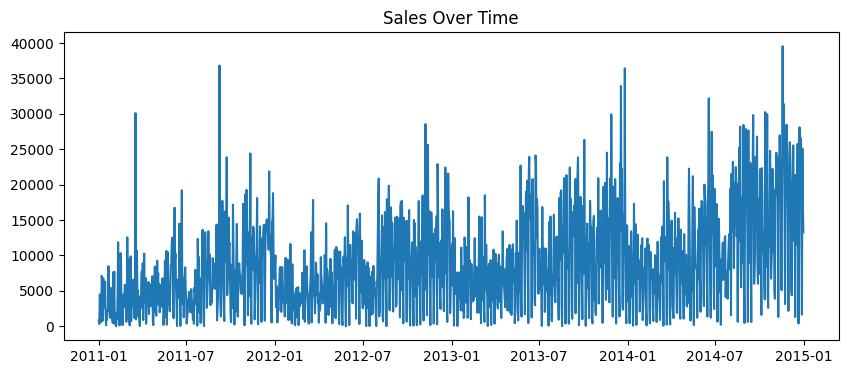

In [17]:
import matplotlib.pyplot as plt

sales_over_time = df.groupby('order_date')['sales'].sum()

plt.figure(figsize=(10,4))
plt.plot(sales_over_time)
plt.title("Sales Over Time")
plt.show()


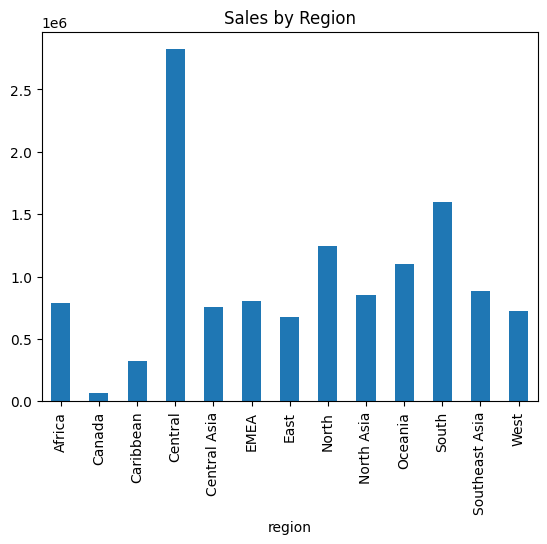

In [18]:
df.groupby('region')['sales'].sum().plot(kind='bar', title="Sales by Region")
plt.show()


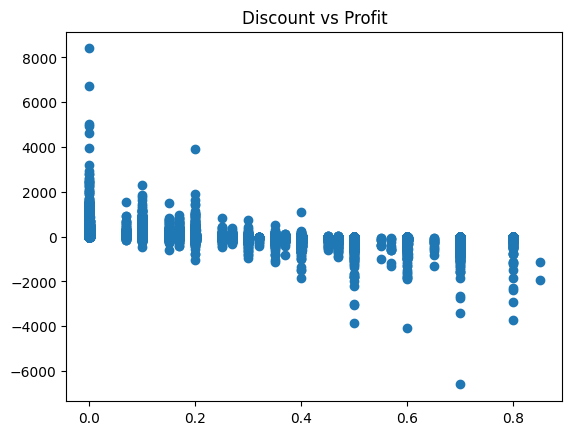

In [19]:
plt.scatter(df['discount'], df['profit'])
plt.title("Discount vs Profit")
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


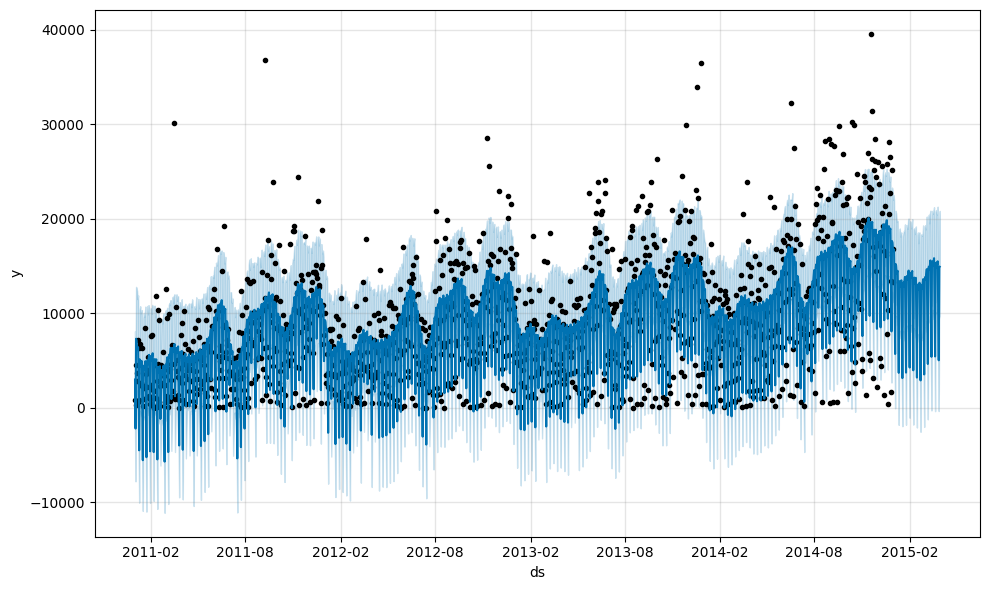

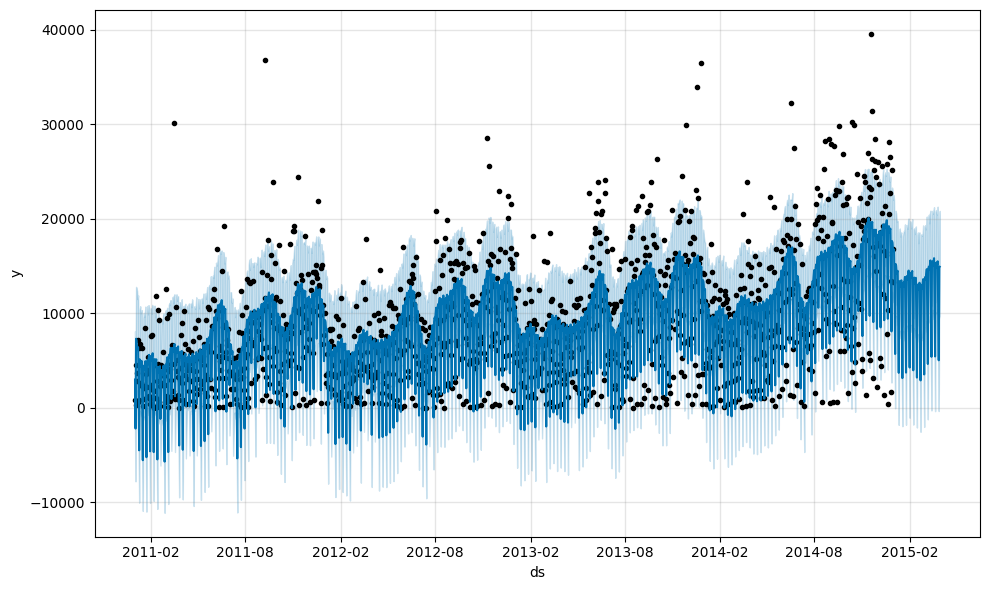

In [20]:
from prophet import Prophet

prophet_df = df.groupby('order_date')['sales'].sum().reset_index()
prophet_df.columns = ['ds', 'y']

model = Prophet()
model.fit(prophet_df)

future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

model.plot(forecast)
